In [311]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cd_data

config_name = 'complex_120'
config = importlib.import_module(f"config.{config_name}")
vit = load_model_config(config)
vit_data = load_cd_data()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader)

Split: time,120.0; Training: 19921; Validation: 2214; Testing: 4427


In [333]:
device = trainer.device
vit = trainer.vit

In [334]:
trainer.setup()

Creating directory: output/complex_120_20220526_0acf...


In [335]:
vit.load_state_dict(torch.load('output/complex_120_20220524_1abd/model.torch', map_location=torch.device('cpu')))

<All keys matched successfully>

In [336]:
# trainer.train()

In [337]:
trainer.compute_predictions_losses()

In [338]:
print(trainer.perf_str)

Loss:
  Train:	0.101
  Valid:	0.091
  Test: 	0.708

R2:
  Train:	0.901
  Valid:	0.904
  Test: 	0.235


(-5.0, 5.0)

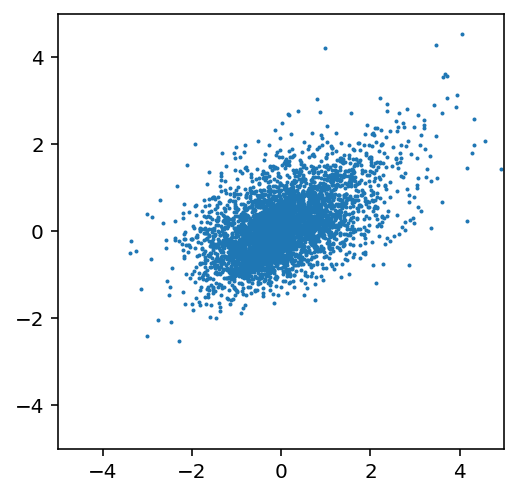

In [339]:
plt.figure(figsize=(4,4))
plt.scatter(trainer.test_tx, trainer.test_predictions, s=1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [286]:
from src.rna_plotter import load_rna_plotter

rna_plotter = load_rna_plotter()

In [293]:
rna_plotter.set_span_chrom((429116-2000, 429116+2000), 2)

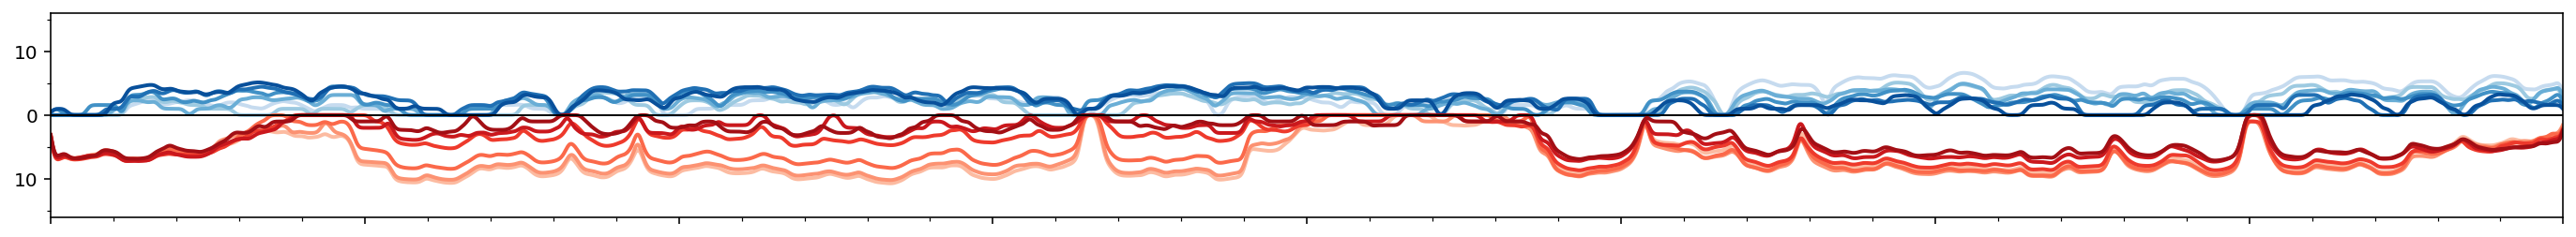

In [294]:
rna_plotter.plot()

In [346]:
from src.vit_data_2 import load_cd_data

vit_data = load_cd_data()